<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/Week-03/Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Mengimpor Liblary



In [65]:
# Mengimpor library
import numpy as np
import pandas as pd

### Membaca file insurance.csv

In [66]:
data = pd.read_csv('insurance.csv')

In [67]:
data.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


In [68]:
data.shape

(1338, 7)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [72]:
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data['sex'] = le.fit_transform(data['sex'])



In [73]:
import matplotlib.pyplot as plt

In [74]:
import seaborn as sns

<ipython-input-75-5acc77321bd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="crest", annot=True)


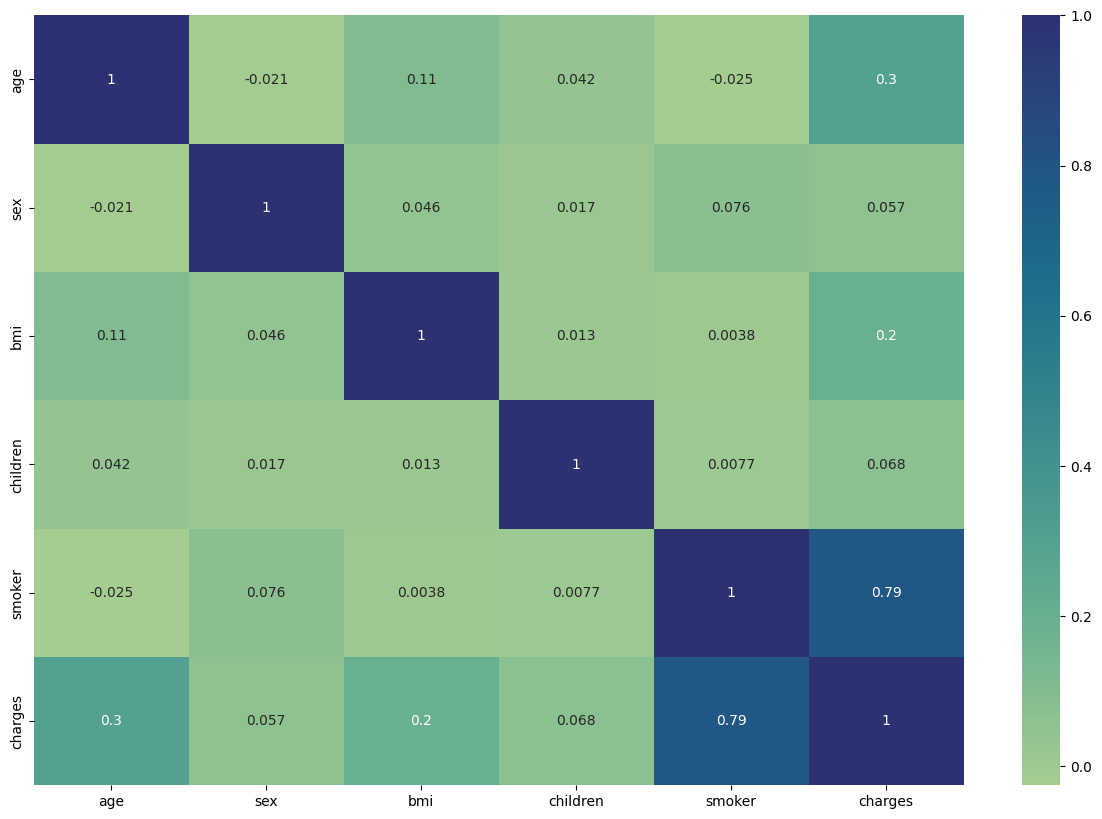

In [75]:
sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.gcf().set_size_inches(15,10)
plt.show()

In [76]:
# Memasukkan region

data['region'] = le.fit_transform(data['region'])

# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(
    data[['region']]).  toarray())

# Merge with main
data = data.join(enc_data)

In [77]:
data.head(100)

,age,sex,bmi,children,smoker,region,charges,0,1,2,3
0,19,0,27.900,0,1,3,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,28,0,37.620,1,0,2,3766.88380,0.0,0.0,1.0,0.0
96,54,0,30.800,3,0,3,12105.32000,0.0,0.0,0.0,1.0
97,55,1,38.280,0,0,2,10226.28420,0.0,0.0,1.0,0.0
98,56,1,19.950,0,1,0,22412.64850,1.0,0.0,0.0,0.0


### Visualisasi Data

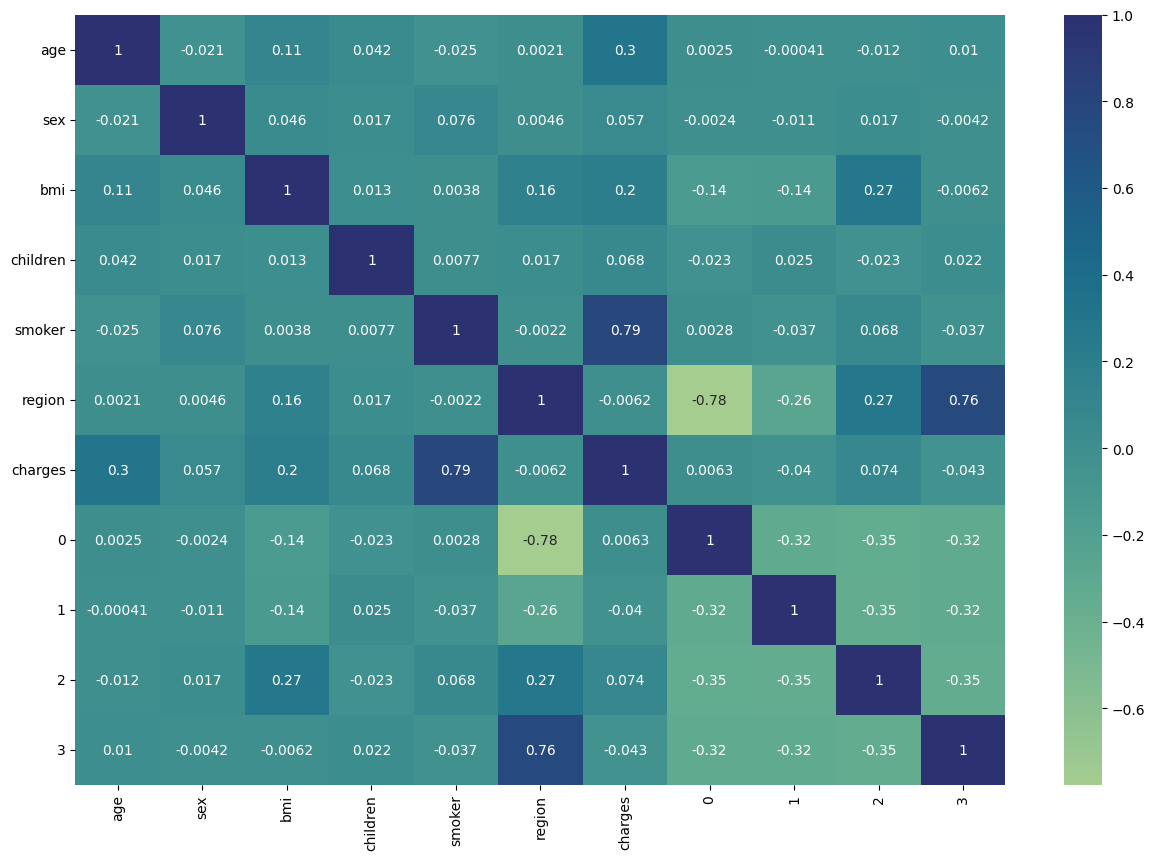

In [78]:
#Heatmap

sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.gcf().set_size_inches(15,10)
plt.show()

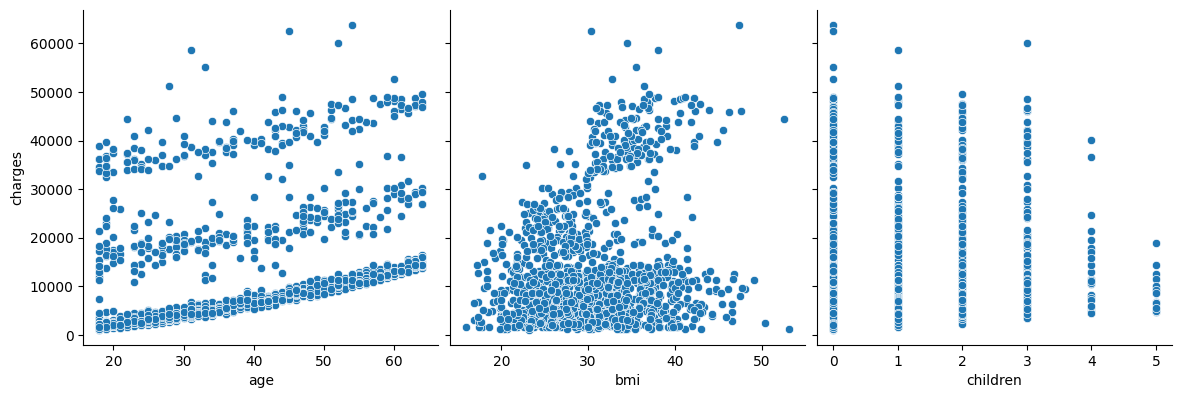

In [79]:
#scatterplot

sns.pairplot(data, x_vars=['age','bmi','children'], y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

Dari Visualisasi datas dapat dilihat bahwa yang paling berkorelasi kuat terhadap charges adalah age

### Regresi Linier

In [80]:
# Membuat variable bebas

X = data[['age','sex','bmi','children','smoker','region']]
y = data['charges']

In [81]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [82]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Membagi dataset menjadi data latih (train) dan data uji (test)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
 # Pemisahan data uji dan data latih dengan proporsi 7:3
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size=0.3, random_state=0)

In [85]:
X_train

,age,sex,bmi,children,smoker,region
1163,18,0,28.215,0,0,0
196,39,0,32.800,0,0,3
438,52,0,46.750,5,0,2
183,44,0,26.410,0,0,1
1298,33,1,27.455,2,0,1
...,...,...,...,...,...,...
763,27,1,26.030,0,0,0
835,42,1,35.970,2,0,2
1216,40,1,25.080,0,0,2
559,19,1,35.530,0,0,1


In [86]:
y_train

1163     2200.83085
196      5649.71500
438     12592.53450
183      7419.47790
1298     5261.46945
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 936, dtype: float64

In [87]:
import statsmodels.api as sm

In [88]:
#training model

X_train_sm = sm.add_constant(X_train)


In [89]:
#fitting garis regresi

lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const      -11827.733142
age           256.577262
sex           -49.392324
bmi           329.023816
children      479.084998
smoker      23400.283788
region       -276.315762
dtype: float64

In [90]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     420.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.32e-260
Time:                        13:00:10   Log-Likelihood:                -9495.8
No. Observations:                 936   AIC:                         1.901e+04
Df Residuals:                     929   BIC:                         1.904e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1157.908    -10.215      0.000   -1.41e+04   -9555.314
age          256.5773     14.610     17.561      0.000     227.904     285.250
sex          -49.3923    405.572     -0.122      0.903    -845.336     746.551
bmi          329.0238     33.124      9.933      0.000     264.017     394.031
children     479.0850    168.456      2.844      0.005     148.488     809.682
smoker       2.34e+04    504.923     46.344      0.000    2.24e+04    2.44e+04
region      -276.3158    186.173     -1.484      0.138    -641.684      89.053
==============================================================================
Omnibus:                      231.712   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              565.807
Skew:                           1.305   Prob(JB):                    1.37e-123
Kurtosis:                       5.774   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Future Scaling

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

### Modeling

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
linear_model = LinearRegression()
linear_model.fit(x_train_scaled, y_train)

LinearRegression()

### Predict

In [95]:
y_pred = linear_model.predict(x_test_scaled)

### Eval

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 4013.6929857811997
MSE: 33311355.281859964
RMSE: 5771.599022962351
R-squared: 0.7911113876316933


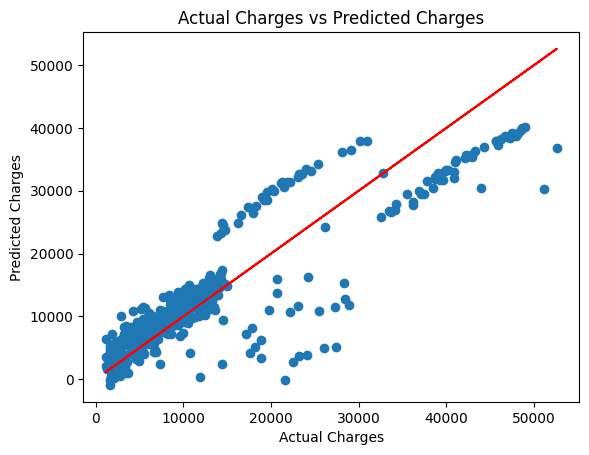

In [106]:
# visualisasi data
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,'r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()